In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_calc=pd.read_csv('mass_case(with_jpg_img).csv')
df_mass=pd.read_csv('calc_case(with_jpg_img).csv')

In [3]:
df_all=pd.concat([df_calc, df_mass], ignore_index=True)
df_all.sample(10)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,jpg_fullMammo_img_path,jpg_crop_img_path,jpg_ROI_img_path,breast density,calc type,calc distribution
152,P_00224,3.0,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,3,BENIGN,4,jpg_img/Mass_Training_P_00224_LEFT_CC-1.3.6.1....,jpg_img/Mass_Training_P_00224_LEFT_CC_1-1.3.6....,jpg_img/Mass_Training_P_00224_LEFT_CC_1-1.3.6....,NaN,NaN,NaN
2710,P_01306,NaN,RIGHT,CC,2,calcification,NaN,NaN,2,BENIGN_WITHOUT_CALLBACK,3,jpg_img/Calc_Training_P_01306_RIGHT_CC-1.3.6.1...,jpg_img/Calc_Training_P_01306_RIGHT_CC_2-1.3.6...,jpg_img/Calc_Training_P_01306_RIGHT_CC_2-1.3.6...,3.0,VASCULAR,NaN
1937,P_00346,NaN,RIGHT,MLO,1,calcification,NaN,NaN,3,BENIGN,3,jpg_img/Calc_Training_P_00346_RIGHT_MLO-1.3.6....,jpg_img/Calc_Training_P_00346_RIGHT_MLO_1-1.3....,jpg_img/Calc_Training_P_00346_RIGHT_MLO_1-1.3....,3.0,AMORPHOUS,CLUSTERED
99,P_00117,2.0,LEFT,MLO,1,mass,LOBULATED,CIRCUMSCRIBED,4,BENIGN,3,jpg_img/Mass_Training_P_00117_LEFT_MLO-1.3.6.1...,jpg_img/Mass_Training_P_00117_LEFT_MLO_1-1.3.6...,jpg_img/Mass_Training_P_00117_LEFT_MLO_1-1.3.6...,NaN,NaN,NaN
2871,P_01462,NaN,LEFT,MLO,1,calcification,NaN,NaN,2,BENIGN_WITHOUT_CALLBACK,5,jpg_img/Calc_Training_P_01462_LEFT_MLO-1.3.6.1...,jpg_img/Calc_Training_P_01462_LEFT_MLO_1-1.3.6...,jpg_img/Calc_Training_P_01462_LEFT_MLO_1-1.3.6...,2.0,LUCENT_CENTER,NaN
2318,P_00780,NaN,RIGHT,CC,4,calcification,NaN,NaN,2,BENIGN_WITHOUT_CALLBACK,4,jpg_img/Calc_Training_P_00780_RIGHT_CC-1.3.6.1...,jpg_img/Calc_Training_P_00780_RIGHT_CC_4-1.3.6...,jpg_img/Calc_Training_P_00780_RIGHT_CC_4-1.3.6...,1.0,FINE_LINEAR_BRANCHING,NaN
2761,P_01362,NaN,RIGHT,CC,1,calcification,NaN,NaN,4,BENIGN,2,jpg_img/Calc_Training_P_01362_RIGHT_CC-1.3.6.1...,jpg_img/Calc_Training_P_01362_RIGHT_CC_1-1.3.6...,jpg_img/Calc_Training_P_01362_RIGHT_CC_1-1.3.6...,3.0,PLEOMORPHIC,CLUSTERED
1202,P_01720,2.0,RIGHT,CC,1,mass,LOBULATED,CIRCUMSCRIBED,3,BENIGN,4,jpg_img/Mass_Training_P_01720_RIGHT_CC-1.3.6.1...,jpg_img/Mass_Training_P_01720_RIGHT_CC_1-1.3.6...,jpg_img/Mass_Training_P_01720_RIGHT_CC_1-1.3.6...,NaN,NaN,NaN
2224,P_00658,NaN,LEFT,CC,1,calcification,NaN,NaN,5,MALIGNANT,3,jpg_img/Calc_Training_P_00658_LEFT_CC-1.3.6.1....,jpg_img/Calc_Training_P_00658_LEFT_CC_1-1.3.6....,jpg_img/Calc_Training_P_00658_LEFT_CC_1-1.3.6....,3.0,PLEOMORPHIC,SEGMENTAL
2131,P_00555,NaN,RIGHT,MLO,1,calcification,NaN,NaN,2,BENIGN_WITHOUT_CALLBACK,4,jpg_img/Calc_Training_P_00555_RIGHT_MLO-1.3.6....,jpg_img/Calc_Training_P_00555_RIGHT_MLO_1-1.3....,jpg_img/Calc_Training_P_00555_RIGHT_MLO_1-1.3....,3.0,COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED,NaN


In [4]:
df_all["pathology"].value_counts()

pathology
MALIGNANT                  1457
BENIGN                     1429
BENIGN_WITHOUT_CALLBACK     682
Name: count, dtype: int64

In [5]:
# Select only image columns and pathology
image_columns = ['jpg_fullMammo_img_path', 'jpg_crop_img_path', 'jpg_ROI_img_path', 'pathology']
df_selected = df_all[image_columns]


# Create separate columns for each pathology type
df_selected['MALIGNANT_IMG'] = df_selected['jpg_fullMammo_img_path'].where(df_selected['pathology'] == 'MALIGNANT')
df_selected['BENIGN_IMG'] = df_selected['jpg_fullMammo_img_path'].where(df_selected['pathology'] == 'BENIGN')
df_selected['BENIGN_WITHOUT_CALLBACK_IMG'] = df_selected['jpg_fullMammo_img_path'].where(df_selected['pathology'] == 'BENIGN_WITHOUT_CALLBACK')

# Drop unnecessary columns
df_final = df_selected[['MALIGNANT_IMG', 'BENIGN_IMG', 'BENIGN_WITHOUT_CALLBACK_IMG']]

# Save to CSV
df_final.to_csv('final_image_data.csv', index=False)

# Display the first few rows
df_final.sample(10)

/var/folders/54/w2n5lhs95dx4554rq0t6wr_00000gn/T/ipykernel_1258/472904799.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['MALIGNANT_IMG'] = df_selected['jpg_fullMammo_img_path'].where(df_selected['pathology'] == 'MALIGNANT')
/var/folders/54/w2n5lhs95dx4554rq0t6wr_00000gn/T/ipykernel_1258/472904799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BENIGN_IMG'] = df_selected['jpg_fullMammo_img_path'].where(df_selected['pathology'] == 'BENIGN')
/var/folders/54/w2n5lhs95dx4554rq0

,MALIGNANT_IMG,BENIGN_IMG,BENIGN_WITHOUT_CALLBACK_IMG
3048,NaN,NaN,jpg_img/Calc_Training_P_01769_LEFT_MLO-1.3.6.1...
1141,jpg_img/Mass_Training_P_01642_RIGHT_MLO-1.3.6....,NaN,NaN
1065,NaN,jpg_img/Mass_Training_P_01532_LEFT_MLO-1.3.6.1...,NaN
2499,NaN,jpg_img/Calc_Training_P_01034_LEFT_CC-1.3.6.1....,NaN
44,NaN,jpg_img/Mass_Training_P_00061_RIGHT_CC-1.3.6.1...,NaN
771,NaN,jpg_img/Mass_Training_P_01123_LEFT_CC-1.3.6.1....,NaN
3255,NaN,NaN,jpg_img/Calc_Test_P_00077_RIGHT_MLO-1.3.6.1.4....
891,jpg_img/Mass_Training_P_01270_RIGHT_CC-1.3.6.1...,NaN,NaN
1012,jpg_img/Mass_Training_P_01444_RIGHT_MLO-1.3.6....,NaN,NaN
2266,jpg_img/Calc_Training_P_00710_RIGHT_CC-1.3.6.1...,NaN,NaN


In [6]:
df_final.isnull().sum()

MALIGNANT_IMG                  2111
BENIGN_IMG                     2139
BENIGN_WITHOUT_CALLBACK_IMG    2886
dtype: int64

In [7]:
# Merge all image paths into a single column while keeping pathology labels
df_selected['All_Images'] = df_selected[['jpg_fullMammo_img_path', 'jpg_crop_img_path', 'jpg_ROI_img_path']].apply(
    lambda row: ', '.join(row.dropna()), axis=1)

# Keep only the merged image column and pathology
df_final = df_selected[['All_Images', 'pathology']]

# Save to CSV for CNN training
df_final.to_csv('cnn_image_data.csv', index=False)

# Display preview
df_final.head()

/var/folders/54/w2n5lhs95dx4554rq0t6wr_00000gn/T/ipykernel_1258/3374628412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['All_Images'] = df_selected[['jpg_fullMammo_img_path', 'jpg_crop_img_path', 'jpg_ROI_img_path']].apply(


,All_Images,pathology
0,jpg_img/Mass_Training_P_00001_LEFT_CC-1.3.6.1....,MALIGNANT
1,jpg_img/Mass_Training_P_00001_LEFT_MLO-1.3.6.1...,MALIGNANT
2,jpg_img/Mass_Training_P_00004_LEFT_CC-1.3.6.1....,BENIGN
3,jpg_img/Mass_Training_P_00004_LEFT_MLO-1.3.6.1...,BENIGN
4,jpg_img/Mass_Training_P_00004_RIGHT_MLO-1.3.6....,BENIGN


In [8]:
df_final.isnull().sum()


All_Images    0
pathology     0
dtype: int64

In [9]:
df_final.shape

(3568, 2)

In [10]:
df1=pd.read_csv("cnn_image_data.csv")

In [11]:
df1


,All_Images,pathology
0,jpg_img/Mass_Training_P_00001_LEFT_CC-1.3.6.1....,MALIGNANT
1,jpg_img/Mass_Training_P_00001_LEFT_MLO-1.3.6.1...,MALIGNANT
2,jpg_img/Mass_Training_P_00004_LEFT_CC-1.3.6.1....,BENIGN
3,jpg_img/Mass_Training_P_00004_LEFT_MLO-1.3.6.1...,BENIGN
4,jpg_img/Mass_Training_P_00004_RIGHT_MLO-1.3.6....,BENIGN
...,...,...
3563,jpg_img/Calc_Test_P_02464_RIGHT_MLO-1.3.6.1.4....,MALIGNANT
3564,jpg_img/Calc_Test_P_02498_RIGHT_CC-1.3.6.1.4.1...,BENIGN
3565,jpg_img/Calc_Test_P_02498_RIGHT_MLO-1.3.6.1.4....,BENIGN
3566,jpg_img/Calc_Test_P_02501_RIGHT_CC-1.3.6.1.4.1...,MALIGNANT


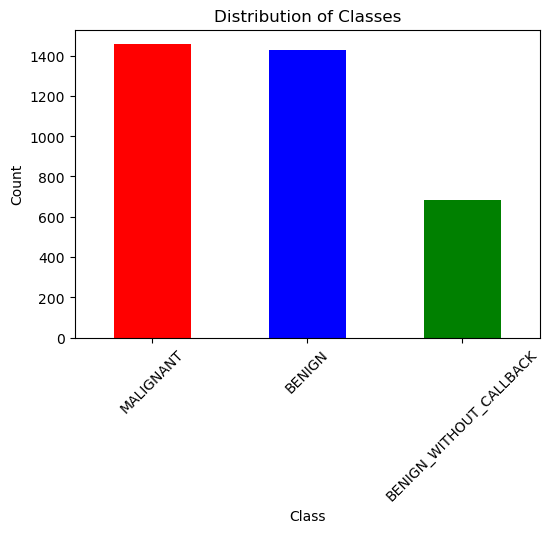

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cnn_image_data.csv")

# Count class distribution
class_counts = df.iloc[:, 1].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color=["red", "blue", "green"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Classes")
plt.xticks(rotation=45)
plt.show()


In [13]:
df1=pd.read_csv('cnn_image_data.csv')

In [14]:
df1.head()

,All_Images,pathology
0,jpg_img/Mass_Training_P_00001_LEFT_CC-1.3.6.1....,MALIGNANT
1,jpg_img/Mass_Training_P_00001_LEFT_MLO-1.3.6.1...,MALIGNANT
2,jpg_img/Mass_Training_P_00004_LEFT_CC-1.3.6.1....,BENIGN
3,jpg_img/Mass_Training_P_00004_LEFT_MLO-1.3.6.1...,BENIGN
4,jpg_img/Mass_Training_P_00004_RIGHT_MLO-1.3.6....,BENIGN


In [15]:
df1.isnull().sum()

All_Images    0
pathology     0
dtype: int64

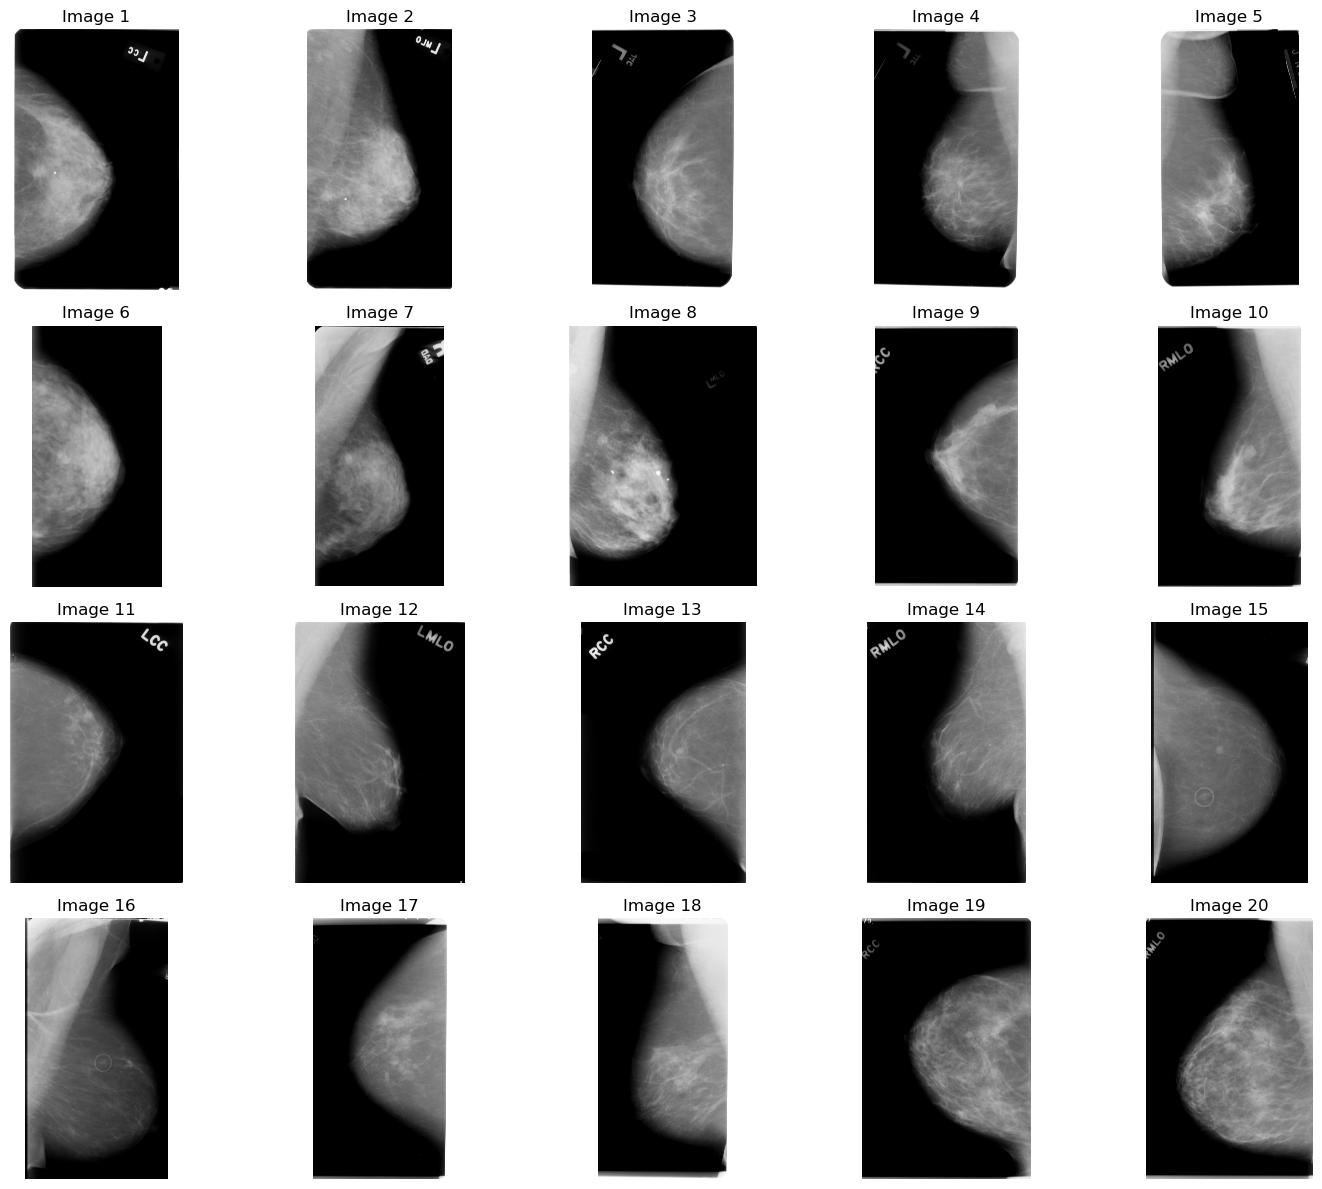

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load dataset
df = pd.read_csv("cnn_image_data.csv")

# Base directory where images are stored
base_folder = "k_CBIS-DDSM"

# Function to load and display multiple images
def show_images(image_paths, rows=4, cols=5):  # 4x5 grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))  # Create subplots
    axes = axes.flatten()  # Flatten axes array for easy iteration

    for i in range(rows * cols):  
        if i >= len(image_paths):  # If images are less than 20, break
            break
        
        image_path = image_paths[i].split(",")[0].strip()  # Handle multiple paths in a cell
        full_path = os.path.join(base_folder, image_path)

        if os.path.exists(full_path):
            img = Image.open(full_path)
            axes[i].imshow(img, cmap="gray")  # Display image
            axes[i].axis("off")  # Hide axes
            axes[i].set_title(f"Image {i+1}")  # Add title
        else:
            axes[i].text(0.5, 0.5, "File Not Found", ha='center', va='center', fontsize=10)
            axes[i].axis("off")  # Hide axes if image is missing

    plt.tight_layout()  # Adjust layout
    plt.show()

# Get first 20 image paths from the DataFrame
image_paths = df["All_Images"][:20].tolist()

# Display the images
show_images(image_paths)


In [17]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [18]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [19]:
# Load dataset
df = pd.read_csv("cnn_image_data.csv")

# Base directory for images
base_folder = "k_CBIS-DDSM"


In [20]:
# Image parameters
IMG_SIZE = (224, 224)  # Resize images
BATCH_SIZE = 32

# Function to load images and labels
def load_data(df):
    images = []
    labels = []

    for _, row in df.iterrows():
        image_path = row["All_Images"].split(",")[0].strip()  # Take first image if multiple
        full_path = os.path.join(base_folder, image_path)

        if os.path.exists(full_path):
            img = load_img(full_path, target_size=IMG_SIZE)  # Load and resize image
            img_array = img_to_array(img) / 255.0  # Normalize (0 to 1)
            images.append(img_array)
            labels.append(1 if row["pathology"] == "MALIGNANT" else 0)  # Convert labels

    return np.array(images), np.array(labels)


In [21]:
!pip install imgaug


  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.1 MB/s eta 0:00:00a 0:00:01


In [22]:
# Load images and labels
X, y = load_data(df)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print(df["pathology"].isna().sum())  # Check for missing values


0


In [24]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate image by 20 degrees
    width_shift_range=0.2,  # Shift horizontally by 20%
    height_shift_range=0.2, # Shift vertically by 20%
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip images horizontally
    fill_mode="nearest"     # Fill missing pixels
)


In [25]:
# Filter minority class
minority_df = df[df["pathology"] == "BENIGN_WITHOUT_CALLBACK"]
X_minority, y_minority = load_data(minority_df)

# Generate augmented images
augmented_images = []
augmented_labels = []

for img in X_minority:
    img = img.reshape((1,) + img.shape)  # Reshape for ImageDataGenerator
    
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])  # Extract image from batch
        augmented_labels.append(2)  # Label for BENIGN_WITHOUT_CALLBACK
        
        i += 1
        if i >= 2:  # Generate 2 augmented images per original image
            break

# Convert to NumPy arrays
aug_images = np.array(augmented_images)
aug_labels = np.array(augmented_labels)


In [26]:
print(X_train.shape)  # Expected: (num_samples, 224, 224, 3)
print(aug_images.shape)  # Expected: (num_augmented_samples, 224, 224, 3)


(2854, 224, 224, 3)
(1364, 224, 224, 3)


In [27]:
print("X_minority shape:", X_minority.shape)


X_minority shape: (682, 224, 224, 3)


In [28]:
print("X_minority shape:", X_minority.shape)
print("Number of BENIGN_WITHOUT_CALLBACK images:", len(minority_df))


X_minority shape: (682, 224, 224, 3)
Number of BENIGN_WITHOUT_CALLBACK images: 682


In [29]:
X_train = np.concatenate([X_train, aug_images])
y_train = np.concatenate([y_train, aug_labels])

print("New Training Set Size:", X_train.shape)


New Training Set Size: (4218, 224, 224, 3)


In [30]:
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # 1st Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # 3rd Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the layers
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output Layer (3 classes)
    Dense(3, activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print Model Summary
model.summary()


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-07 14:36:06.456416: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-07 14:36:06.456588: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-07 14:36:06.456604: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-07 14:36:06.456807: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-07 14:36:06.456836: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [32]:


# Train Model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    
                    validation_data=(X_train, y_train),
                    batch_size=32)

Epoch 1/50


2025-04-07 14:36:09.578588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-07 14:36:09.582116: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.5503 - loss: 0.9026 - val_accuracy: 0.7340 - val_loss: 0.5430
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.7014 - loss: 0.5622 - val_accuracy: 0.7482 - val_loss: 0.4799
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.7326 - loss: 0.5216 - val_accuracy: 0.7852 - val_loss: 0.4157
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.7728 - loss: 0.4531 - val_accuracy: 0.8438 - val_loss: 0.3637
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.8033 - loss: 0.3915 - val_accuracy: 0.8706 - val_loss: 0.2956
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.8254 - loss: 0.3520 - val_accuracy: 0.8807 - val_loss: 0.2566
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.8428 - loss: 0.3150 - val_accuracy: 0.8969 - val_loss: 0.2304
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.8585 - loss: 0.2819 - val

In [33]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9926 - loss: 0.0175
Validation Accuracy: 99.48%


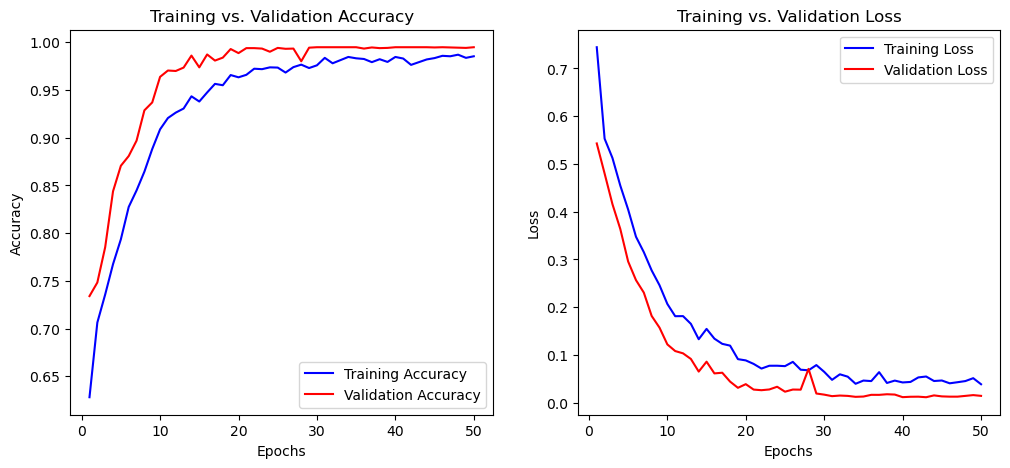

In [34]:
import matplotlib.pyplot as plt

# Extract history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.show()


In [35]:
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_train)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with highest probability


2025-04-07 15:00:45.469580: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step


In [36]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1678   11    0]
 [  11 1154    0]
 [   0    0 1364]]


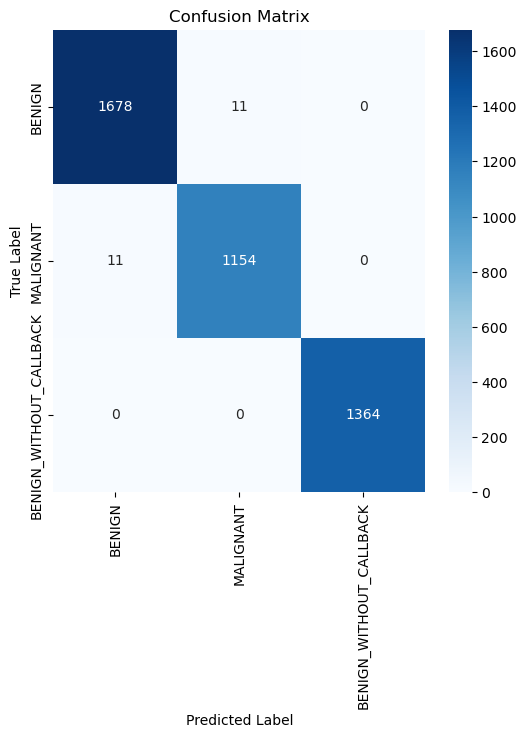

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names
class_names = ["BENIGN", "MALIGNANT", "BENIGN_WITHOUT_CALLBACK"]

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [57]:
# Assuming X_train[0] is the first image in your training data
image_input = np.expand_dims(X_train[1], axis=0)  # Add batch dimension

# Now make a prediction
y_pred_probs = model.predict(image_input)

# Get the predicted class label
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"Predicted Class Label: {y_pred[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class Label: 1


In [59]:
y_train[1]

1

In [49]:
X_train[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.92941177, 0.92941177, 0.92941177],
        [0.92941177, 0.92941177, 0.92941177],
        ...,
        [0.76862746, 0.76862746, 0.76862746],
        [0.76862746, 0.76862746, 0.76862746],
        [0.7764706 , 0.7764706 , 0.7764706 ]],

       [[0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92941177, 0.92941177, 0.92941177],
        [0.92941177, 0.92941177, 0.92941177],
        ...,
        [0.6431373 , 0.6431373 , 0.6431373 ],
        [0.6313726 , 0.6313726 , 0.6313726 ],
        [0.6313726 , 0.6313726 , 0.6313726 ]],

       [[0.9098039 , 0.9098039 , 0.9098039 ],
        [0.8509804 , 0.8509804 , 0.8509804 ],
        [0.85882354, 0.85882354, 0.85882354],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.9019608 , 0

In [47]:
# Save the model to a file (e.g., model.h5)
model.save('model.h5')


In [61]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

# Load and preprocess the image
def prepare_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model's expected input
    img_array = image.img_to_array(img)  # Convert image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (optional if your training used this)
    return img_array

# Path to the image
image_path = 'path_to_your_image.jpg'

# Prepare the image
img = prepare_image(image_path)

# Predict class probabilities for the image
y_pred_probs = model.predict(img)

# Convert probabilities to class label
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"Predicted Class Label: {y_pred[0]}")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_image.jpg'